In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Einlesen der Daten
data_deng: pd.DataFrame = pd.read_csv('dataSources\BLAT_ECOLX_Deng_2012_Kopie.csv', delimiter = ';' )
data_firnberg = pd.read_csv('dataSources\BLAT_ECOLX_Firnberg_2014_Kopie.csv',delimiter = ';')
data_stiffler = pd.read_csv('dataSources\BLAT_ECOLX_Stiffler_2015_Kopie.csv',delimiter = ';')


DMS Score Spalten zu float konvertieren:

In [3]:
data_deng['DMS_score'] = data_deng['DMS_score'].str.replace(',', '.').astype(float)
data_deng.head()

data_stiffler['DMS_score'] = data_stiffler['DMS_score'].str.replace(',', '.').astype(float)
data_stiffler.head()

data_firnberg['DMS_score'] = data_firnberg['DMS_score'].str.replace(',', '.').astype(float)
data_firnberg.tail()



,mutant,mutated_sequence,DMS_score,DMS_score_bin
4778,W286G,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0056,0
4779,W286F,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.1729,0
4780,W286E,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0171,0
4781,W286C,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0024,0
4782,W286D,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0.0114,0


In [4]:

#Mutanten in einheitlicher Reihenfolge speichern, gehen alle von 24 bis 286, bei Firnberg fehlen einige
sortierung = data_deng.iloc[0:len(data_deng),0]
sortierung.head()

sortierung = sortierung.tolist()


Data Frame erstellen

In [5]:

columns = ['Stiffler', 'Deng', 'Firnberg']
index = [sortierung]
merged = pd.DataFrame( columns = columns, index = index)
merged.head()
#leerer frame

,Stiffler,Deng,Firnberg
H24C,NaN,NaN,NaN
H24Y,NaN,NaN,NaN
H24W,NaN,NaN,NaN
H24V,NaN,NaN,NaN
H24T,NaN,NaN,NaN


In [6]:
#dataframe füllen
for i in range(0,len(data_stiffler)):
    mutant = data_stiffler['mutant'][i]
    score = data_stiffler['DMS_score'][i]
    merged['Stiffler'][mutant]= score

merged.head()

  

,Stiffler,Deng,Firnberg
H24C,-0.41826,NaN,NaN
H24Y,-0.885025,NaN,NaN
H24W,-1.347586,NaN,NaN
H24V,-0.026874,NaN,NaN
H24T,-0.067188,NaN,NaN


In [7]:
#deng wird umgedreht *-1
for i in range(0,len(data_deng)):
    mutant = data_deng['mutant'][i]
    score = data_deng['DMS_score'][i]*-1
    merged['Deng'][mutant]= score

merged.head()

,Stiffler,Deng,Firnberg
H24C,-0.41826,3.924478,NaN
H24Y,-0.885025,2.170022,NaN
H24W,-1.347586,4.345218,NaN
H24V,-0.026874,3.011503,NaN
H24T,-0.067188,1.565248,NaN


In [8]:
for i in range(0,len(data_firnberg)):
    mutant = data_firnberg['mutant'][i]
    score = data_firnberg['DMS_score'][i]
    merged['Firnberg'][mutant]= score

print(merged)

       Stiffler      Deng Firnberg
H24C   -0.41826  3.924478   0.5646
H24Y  -0.885025  2.170022   0.7054
H24W  -1.347586  4.345218   0.6021
H24V  -0.026874  3.011503   1.2224
H24T  -0.067188  1.565248   1.2289
...         ...       ...      ...
W286G -3.228429   4.96307   0.0056
W286F -0.780425  4.542329   0.1729
W286E -2.545852  4.542329   0.0171
W286C -2.983762  4.542329   0.0024
W286A -3.178798   4.96307      NaN

[4996 rows x 3 columns]


Merged Dataframe nicht Normalisiert

In [9]:
mergedc_n = merged.copy()
mergedc_z = merged.copy()

print(mergedc_n.head(20))

      Stiffler      Deng Firnberg
H24C  -0.41826  3.924478   0.5646
H24Y -0.885025  2.170022   0.7054
H24W -1.347586  4.345218   0.6021
H24V -0.026874  3.011503   1.2224
H24T -0.067188  1.565248   1.2289
H24S  0.036166  1.901829   1.1215
H24R -0.002526  1.732651   1.0547
H24Q -0.135568  1.685328   0.9294
H24P -1.010848   2.74331   0.2836
H24D -0.181607  2.788294   1.0992
H24M -0.224781  4.345218      NaN
H24L -0.480347  3.924478   0.8055
H24K   0.01447   0.47765   1.2413
H24I -0.359191   2.83688   0.7909
H24G -0.060242  2.113703   1.1275
H24F -0.818487  4.345218   0.7883
H24E -0.279024  1.486533   0.9899
H24N -0.043093  1.102421   1.4825
P25C -0.364138   3.92495   0.6226
P25D -0.028403   3.92495   0.6841


N Normalisierter dataframe :  merged_n

In [10]:
def min_max_filter(mergedc_n: pd.DataFrame) -> pd.DataFrame:
    'Min-Max Normalisierung'
    for x in mergedc_n.columns:
        max_value: float = mergedc_n[x].max()
        min_value: float = mergedc_n[x].min()

        mergedc_n[x] = (mergedc_n[x] - min_value) / (max_value - min_value)
    return mergedc_n
print(min_max_filter(mergedc_n))


       Stiffler      Deng  Firnberg
H24C   0.811164  0.749673  0.194307
H24Y   0.697293  0.543632  0.242832
H24W   0.584448  0.799085   0.20723
H24V   0.906646  0.642454  0.421009
H24T   0.896811  0.472607  0.423249
...         ...       ...       ...
W286G  0.125601  0.871645  0.001654
W286F  0.722811  0.822233  0.059312
W286E  0.292121  0.822233  0.005618
W286C   0.18529  0.822233  0.000551
W286A  0.137709  0.871645       NaN

[4996 rows x 3 columns]


Z Normalisierter data frame: mergedc_z
mü und sigma für Datensätze : 

In [11]:
gauss = {'Stiffler':[],'Deng':[],'Firnberg':[]}

for x in merged.columns:
    mu = np.mean(merged[x])
    sigma = np.std(merged[x])
    
    gauss[x] = [mu, sigma]
print(gauss)



{'Stiffler': [-1.2555861699099258, 1.1515351455907572], 'Deng': [2.7197178679617875, 1.527209855765294], 'Firnberg': [0.5094850899205352, 0.44877201488038154]}


Z-Normalisierung

In [12]:
def z_filter(mergedc_z: pd.DataFrame) -> pd.DataFrame:
    'Z-Normalisierung'
    for x in mergedc_z.columns:
        mu = gauss[x][0]
        sigma = gauss[x][1]
        mergedc_z[x] = (mergedc_z[x]-mu)/ sigma
    return mergedc_z
print(z_filter(mergedc_z))


       Stiffler      Deng  Firnberg
H24C   0.727139  0.788864  0.122813
H24Y   0.321797 -0.359935  0.436558
H24W  -0.079893  1.064359  0.206374
H24V   1.067021  0.191058   1.58859
H24T   1.032012 -0.755934  1.603074
...         ...       ...       ...
W286G -1.713229  1.468922 -1.122809
W286F  0.412633  1.193425 -0.750014
W286E -1.120475  1.193425 -1.097183
W286C -1.500758  1.193425 -1.129939
W286A -1.670129  1.468922       NaN

[4996 rows x 3 columns]


##Normalisierte Datensätze mergen:
1. mean und var berechnen
2. für z und n normalisierte Datensatz 



In [13]:
mergedc_n_mv = mergedc_n.copy()
liste = mergedc_n_mv.mean(axis = 1)
print(liste)




H24C     0.585048
H24Y     0.494585
H24W     0.530254
H24V     0.656703
H24T     0.597556
           ...   
W286G    0.332967
W286F    0.534785
W286E    0.373324
W286C    0.336025
W286A    0.504677
Length: 4996, dtype: object


In [14]:
def mean_var_merge(data : pd.DataFrame):
    
    data['mean'] = data.mean(axis = 1, skipna= True)
    data['var'] = data.var(axis = 1, skipna = True )
    return data
print(mean_var_merge(mergedc_n_mv))
        

       Stiffler      Deng  Firnberg      mean       var
H24C   0.811164  0.749673  0.194307  0.585048   0.07697
H24Y   0.697293  0.543632  0.242832  0.494585  0.035625
H24W   0.584448  0.799085   0.20723  0.530254   0.05985
H24V   0.906646  0.642454  0.421009  0.656703  0.039409
H24T   0.896811  0.472607  0.423249  0.597556  0.045183
...         ...       ...       ...       ...       ...
W286G  0.125601  0.871645  0.001654  0.332967  0.147648
W286F  0.722811  0.822233  0.059312  0.534785  0.114685
W286E  0.292121  0.822233  0.005618  0.373324   0.11444
W286C   0.18529  0.822233  0.000551  0.336025  0.123887
W286A  0.137709  0.871645       NaN  0.504677  0.134665

[4996 rows x 5 columns]


In [15]:
mergedc_z_mv = mergedc_z.copy()

print(mean_var_merge(mergedc_z_mv))


       Stiffler      Deng  Firnberg      mean       var
H24C   0.727139  0.788864  0.122813  0.546272  0.090294
H24Y   0.321797 -0.359935  0.436558  0.132807  0.123592
H24W  -0.079893  1.064359  0.206374  0.396947  0.236378
H24V   1.067021  0.191058   1.58859   0.94889  0.332494
H24T   1.032012 -0.755934  1.603074  0.626384  1.009754
...         ...       ...       ...       ...       ...
W286G -1.713229  1.468922 -1.122809 -0.455705  1.910194
W286F  0.412633  1.193425 -0.750014  0.285348  0.637593
W286E -1.120475  1.193425 -1.097183 -0.341411  1.177952
W286C -1.500758  1.193425 -1.129939 -0.479091  1.421573
W286A -1.670129  1.468922       NaN -0.100603   2.46341

[4996 rows x 5 columns]


Wie namen eines Dataframe ausgeben lassen (Titel für plots) ? Weiß das jemand? stack overflow hat die gleiche frage unbeantwortet....

##Wie sehen unsere Verteilungen nach unterschiedlicher Normalisierung aus? 
1. Nebeneinander anzeigen lassen 


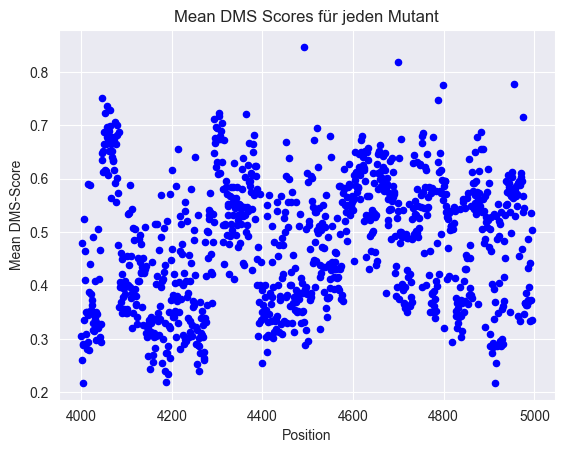

In [16]:

#def plot_zn(data : pd.DataFrame):
#     for x in range(4500, len(data):
#         score = data['mean'][x]
#         position = x
#         plot_mean = plt.scatter(position, scores, s=20, c='blue')
#     plt.xlabel('Position')
#     plt.ylabel('Mean DMS-Score')
#     plt.title('Mean DMS Scores für jeden Mutant')
#     return plot_mean

# plot_zn(mergedc_n_mv)
# plt.show()

for x in range(4000,len(mergedc_n_mv)):
        score = mergedc_n_mv['mean'][x]
        position = x
        plot_mean = plt.scatter(position, score, s=20, c='blue')
    # Diagramm anpassen
plt.xlabel('Position')
plt.ylabel('Mean DMS-Score')
plt.title('Mean DMS Scores für jeden Mutant')     

# Diagramm anzeigen
plt.show()

In [17]:
print(len(mergedc_n_mv))

4996



Merged Model bilden
Varianz Bilden

Quantile Thresholding
Otsu Thresholding
Count Zahl (Tops, Bottoms) 


data frame für merged [datensätze, mean, median,varianz]
data ergebniss dataframemerged[mean positionseffekte, var positionseffekte]
data frame einzelnd[mean positionseffekte, varianz positionseffekte]
5 data frames